In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

from FixedLengthPreprocess import ArmPreprocess
from BinaryClassification.crf_models.CRFModel import CRFModel

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset_folder="/Volumes/Tesi/Dataset/arm-binaries/coreutils_O1"
folds = 10

In [3]:
crf = CRFModel(
    verbose=False,
    max_iter=10,
)

In [4]:
%%time
prepr = ArmPreprocess()
paths = [f_path.path for f_path in os.scandir(dataset_folder)]
X, y = prepr.preprocess(paths)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

CPU times: user 6.35 s, sys: 1.66 s, total: 8.01 s
Wall time: 19.5 s


In [5]:
param_space = [{
    'lookahead': [x],
    'lookbehind': [x],
} for x in range(0, 9)]

gs = GridSearchCV(
    crf,
    param_space,
    cv=folds,
    n_jobs=1,
    verbose=3,
    refit=True,
)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9994261298914688, total=   1.9s
[CV] lookahead=0, lookbehind=0 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, score=0.9995698750194477, total=   1.8s
[CV] lookahead=0, lookbehind=0 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, score=0.9995742088544335, total=   1.8s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9995120564346677, total=   1.8s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9995458768391032, total=   1.8s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9994924136554022, total=   1.9s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9994213992898654, total=   1.9s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9994807693403084, total=   1.9s
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.9994419177113032, total=   2.0s
[CV] lookahead=0, lookbehind=0 ................................

[CV]  lookahead=6, lookbehind=6, score=0.9999861311439032, total=   8.4s
[CV] lookahead=6, lookbehind=6 .......................................
[CV] ............. lookahead=6, lookbehind=6, score=1.0, total=   9.0s
[CV] lookahead=6, lookbehind=6 .......................................
[CV] ............. lookahead=6, lookbehind=6, score=1.0, total=   8.3s
[CV] lookahead=6, lookbehind=6 .......................................
[CV] ............. lookahead=6, lookbehind=6, score=1.0, total=   8.5s
[CV] lookahead=6, lookbehind=6 .......................................
[CV] ............. lookahead=6, lookbehind=6, score=1.0, total=   8.8s
[CV] lookahead=6, lookbehind=6 .......................................
[CV]  lookahead=6, lookbehind=6, score=0.9999113243676359, total=   9.1s
[CV] lookahead=6, lookbehind=6 .......................................
[CV]  lookahead=6, lookbehind=6, score=0.9998245963929094, total=   8.1s
[CV] lookahead=6, lookbehind=6 .......................................


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 10.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=CRFModel(C=1, lookahead=0, lookbehind=0, max_iter=10, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'lookahead': [0], 'lookbehind': [0]}, {'lookahead': [1], 'lookbehind': [1]}, {'lookahead': [2], 'lookbehind': [2]}, {'lookahead': [3], 'lookbehind': [3]}, {'lookahead': [4], 'lookbehind': [4]}, {'lookahead': [5], 'lookbehind': [5]}, {'lookahead': [6], 'lookbehind': [6]}, {'lookahead': [7], 'lookbehind': [7]}, {'lookahead': [8], 'lookbehind': [8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
cv_df = pd.DataFrame(gs.cv_results_)
cv_df.to_csv('grid_search_fixed.csv')

# Visualize
cv_df.sort_values(by='rank_test_score')

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
1       2.902030         0.032633         0.999980          0.999994   
5       7.148740         0.130873         0.999972          0.999996   
2       3.868351         0.055274         0.999971          0.999996   
3       4.847753         0.078378         0.999968          0.999997   
7       8.774209         0.164531         0.999968          0.999997   
4       5.896550         0.115726         0.999967          0.999997   
8      10.407862         0.191385         0.999966          0.999997   
6       8.217576         0.146545         0.999959          0.999997   
0       1.875881         0.007865         0.999491          0.999534   

  param_lookahead param_lookbehind                             params  \
1               1                1  {'lookahead': 1, 'lookbehind': 1}   
5               5                5  {'lookahead': 5, 'lookbehind': 5}   
2               2                2  {'lookahead': 2, 'lookbehind': 2}   
3               3                3  {'lookahead': 3, 'lookbehind': 3}   
7               7                7  {'lookahead': 7, 'lookbehind': 7}   
4               4                4  {'lookahead': 4, 'lookbehind': 4}   
8               8                8  {'lookahead': 8, 'lookbehind': 8}   
6               6                6  {'lookahead': 6, 'lookbehind': 6}   
0               0                0  {'lookahead': 0, 'lookbehind': 0}   

   rank_test_score  split0_test_score  split0_train_score       ...         \
1                1           1.000000            0.999993       ...          
5                2           0.999986            0.999997       ...          
2                3           1.000000            0.999995       ...          
3                4           1.000000            0.999993       ...          
7                5           0.999986            0.999998       ...          
4                6           0.999986            0.999997       ...          
8                7           0.999986            0.999998       ...          
6                8           0.999986            0.999997       ...          
0                9           0.999426            0.999529       ...          

   split7_test_score  split7_train_score  split8_test_score  \
1           0.999976            0.999993           0.999959   
5           1.000000            0.999997           0.999953   
2           0.999976            0.999994           0.999952   
3           1.000000            0.999994           0.999933   
7           0.999936            0.999995           0.999939   
4           1.000000            0.999997           0.999933   
8           0.999936            0.999998           0.999946   
6           0.999936            0.999999           0.999952   
0           0.999481            0.999537           0.999442   

   split8_train_score  split9_test_score  split9_train_score  std_fit_time  \
1            0.999998           0.999976            0.999997      0.183567   
5            1.000000           0.999976            0.999996      0.286385   
2            0.999998           0.999976            0.999997      0.227338   
3            1.000000           0.999976            0.999995      0.291725   
7            0.999997           0.999976            0.999997      0.212509   
4            0.999998           0.999976            0.999996      0.210842   
8            0.999998           0.999976            0.999998      0.314111   
6            0.999998           0.999976            0.999996      0.482176   
0            0.999542           0.999426            0.999531      0.090316   

   std_score_time  std_test_score  std_train_score  
1        0.005629        0.000032         0.000001  
5        0.016689        0.000052         0.000001  
2        0.009327        0.000057         0.000002  
3        0.013340        0.000062         0.000002  
7        0.025284        0.000035         0.000001  
4        0.027250        0.000056       

In [7]:
# Final test
gs.best_estimator_.score(X_test, y_test)

0.99998511001054591

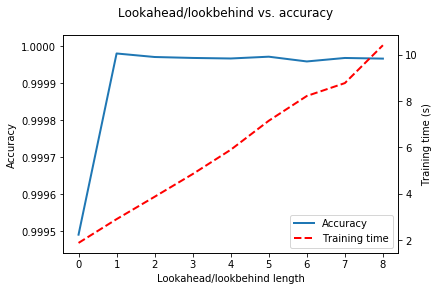

In [11]:
import matplotlib.ticker

# Read from CSV (we don't have to recompute)
cv_df = pd.read_csv('grid_search_fixed.csv')

params = cv_df['param_lookahead'].values.astype('int')
scores = cv_df['mean_test_score'].values
scores_std = cv_df['std_test_score'].values
fit_time = cv_df['mean_fit_time'].values

fig, ax = plt.subplots()
fig.suptitle('Lookahead/lookbehind vs. accuracy')

accuracy_line = ax.plot(params, scores, linewidth=2.0, label='Accuracy')
ax.set_xlabel('Lookahead/lookbehind length')
ax.set_ylabel('Accuracy')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))
ax.margins(0.1) # to visualize the tick for accuracy=1.0

ax2 = ax.twinx()
time_line = ax2.plot(params, fit_time, 'r--', linewidth=2.0, label='Training time')
ax2.set_ylabel('Training time (s)')

lns = accuracy_line + time_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

fig.savefig('figures/hyperparam_codediscovery_fixed.pdf', bbox_inches='tight')